In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['曝光人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['曝光人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['曝光人数'] >a) & (data['曝光人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['曝光人数'].values.reshape(-1,1)
    jindian = data_min['入店人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-等级的门店数量:' + str(df['cluster'].count()))    
        x = x+1


In [3]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚月季度数据/6月份数据/2data/Ddata.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
# data

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backe

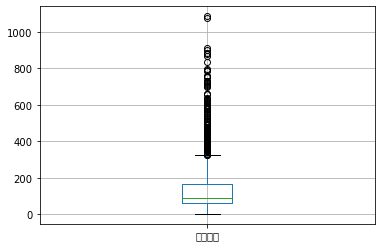

In [5]:
data.boxplot('曝光人数')

In [6]:
a = data['曝光人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0


--------------
中位: 91.0
平均: 135.79738933030646
--------------
50% : 91.0
75% : 165.75
100%: 325.875
max : 1087.0
--------------


In [7]:
print('min')
line_bg_rd(q04,q1)
print('##################################')
print('one')
line_bg_rd(q1,q2)
print('##################################')
print('two')
line_bg_rd(q2,q3)
print('##################################')
print('max')
line_bg_rd(q3,q04)

min
数据分集查看
X训练 (653, 1)
y训练 (653, 1)
X测试 (218, 1)
y测试 (218, 1)
-------------
线性结截距: [0.13665391]
回归系数 [[0.03265654]]
RMSE: 1.8302727301416635
##################################
one
数据分集查看
X训练 (329, 1)
y训练 (329, 1)
X测试 (110, 1)
y测试 (110, 1)
-------------
线性结截距: [-0.30715845]
回归系数 [[0.02847968]]
RMSE: 2.9624163574685944
##################################
two
数据分集查看
X训练 (240, 1)
y训练 (240, 1)
X测试 (80, 1)
y测试 (80, 1)
-------------
线性结截距: [0.87558618]
回归系数 [[0.01792861]]
RMSE: 2.5582036534519528
##################################
max
数据分集查看
X训练 (90, 1)
y训练 (90, 1)
X测试 (31, 1)
y测试 (31, 1)
-------------
线性结截距: [5.01371385]
回归系数 [[0.01209316]]
RMSE: 4.527694217572487


In [8]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)


data = 

In [9]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

15
59
73
108


e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0, flags=flags)


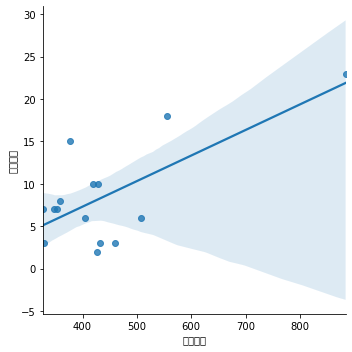

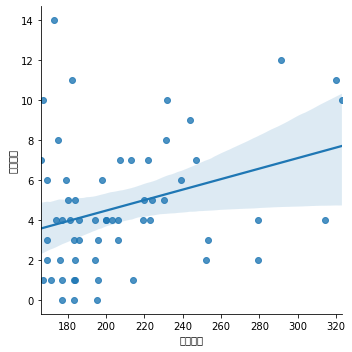

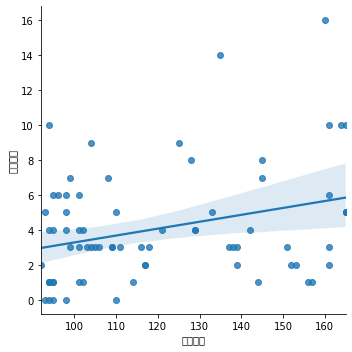

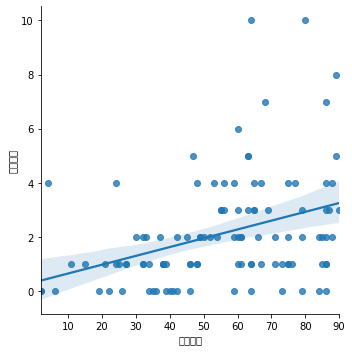

In [10]:
sns.lmplot(x="曝光人数", y="入店人数",data=data_max,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_one,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_two,fit_reg=True)
sns.lmplot(x="曝光人数", y="入店人数",data=data_min,fit_reg=True)

In [11]:
data_8000 = data[data['曝光人数'] > 6000]

In [12]:
data_8000.drop_duplicates(subset='商家ID',inplace=False,keep='last')

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
